<a href="https://colab.research.google.com/github/angievig/CyED3/blob/main/Transducers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# First example, ex1

Given $\Sigma = \{a,b\}$ build build a FST that translates strings represented by $a(b \cup a)^+b$ into $x(y \cup x)^+y$

## Steps to solve the problem


Define each part of the transducer (7-tuple)---the easy parts ;-)


  1.   $Q = \{ q_0, \dots, q_3\}$  $\to$ set of states
  2.   $\Sigma= \{a, b\}$ $\to$  input alphabet.
  3. $\Gamma = \{x, y\}$ $\to$  output alphabet.
  4. $\delta \, : \, Q \times \Sigma \cup \{\lambda\}\longrightarrow Q$ is the **transition function**.
  5. $\omega \, : \, Q \times \Sigma \cup \{\lambda\} \longrightarrow \Gamma$ is the **output function**.
  6. $q_0 $ the start state.
  7.  $ F = \{q_3\}$ $\to$ set of accepting states.

Let's take a look to the diagram then we'll define the transition function and output function

  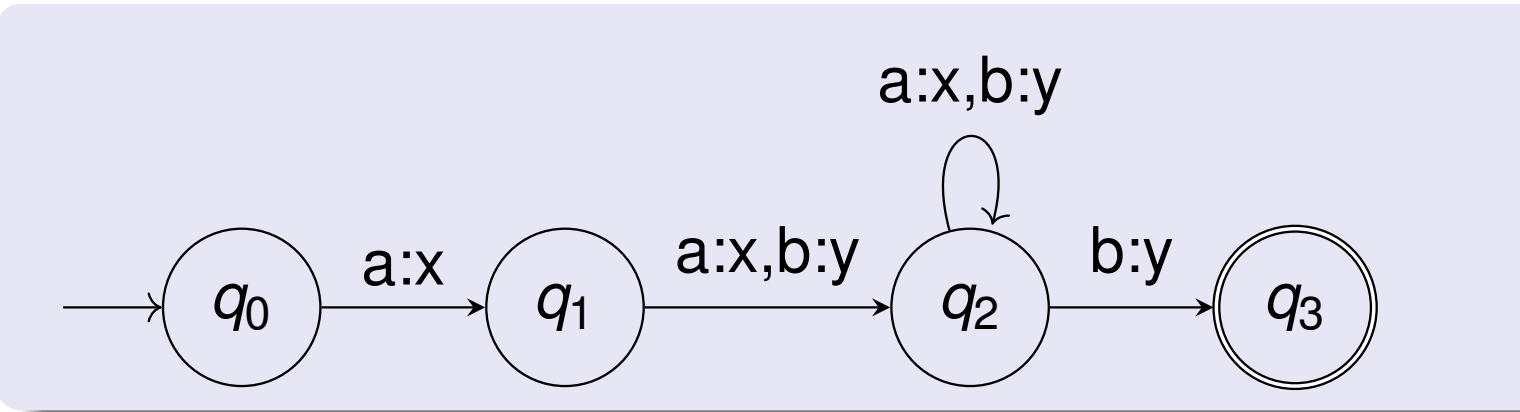

Let's install the library for starters

In [ ]:
!pip install pyformlang


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.5/128.5 kB 2.5 MB/s eta 0:00:00


We import the [FST module](https://github.com/Aunsiels/pyformlang/blob/master/pyformlang/fst/fst.py)

In [ ]:
from pyformlang.fst import FST


In [ ]:
transducer = FST()

transducer.add_transitions([('q0','a','q1',['x']),
                            ('q1','a','q2',['x']),
                            ('q1','b','q2',['y']),
                            ('q2','a','q2',['x']),
                            ('q2','b','q2',['y']),
                            ('q2','b','q3',['y'])])

transducer.add_start_state('q0')
transducer.add_final_state('q3')

print(transducer.states)
print(transducer.input_symbols)
print(transducer.output_symbols)
print(transducer.start_states)
print(transducer.final_states)

print('translate output: ', transducer.translate('ababb'))

print("translate output's type: ", type(transducer.translate('ababb')))

print('output as a list', list(transducer.translate('ababb')))

for char in transducer.translate('ababb'):
  print(char)

out= list(transducer.translate('ababb'))[0]
print('Out',out)

print(" ".join(list(transducer.translate('ababb'))[0]))
print("".join(list(transducer.translate('aaaaab'))[0]))
print("".join(list(transducer.translate('abb'))[0]))

{'q1', 'q2', 'q3', 'q0'}
{'a', 'b'}
{'y', 'x'}
{'q0'}
{'q3'}
translate output:  <generator object FST.translate at 0x7e377169a2b0>
translate output's type:  <class 'generator'>
output as a list [['x', 'y', 'x', 'y', 'y']]
['x', 'y', 'x', 'y', 'y']
Out ['x', 'y', 'x', 'y', 'y']
xyxyy
xxxxxy
xyy


# Second example
Build a FST that given the verb *llorar* in infinitive gives you all the possible conjugations.

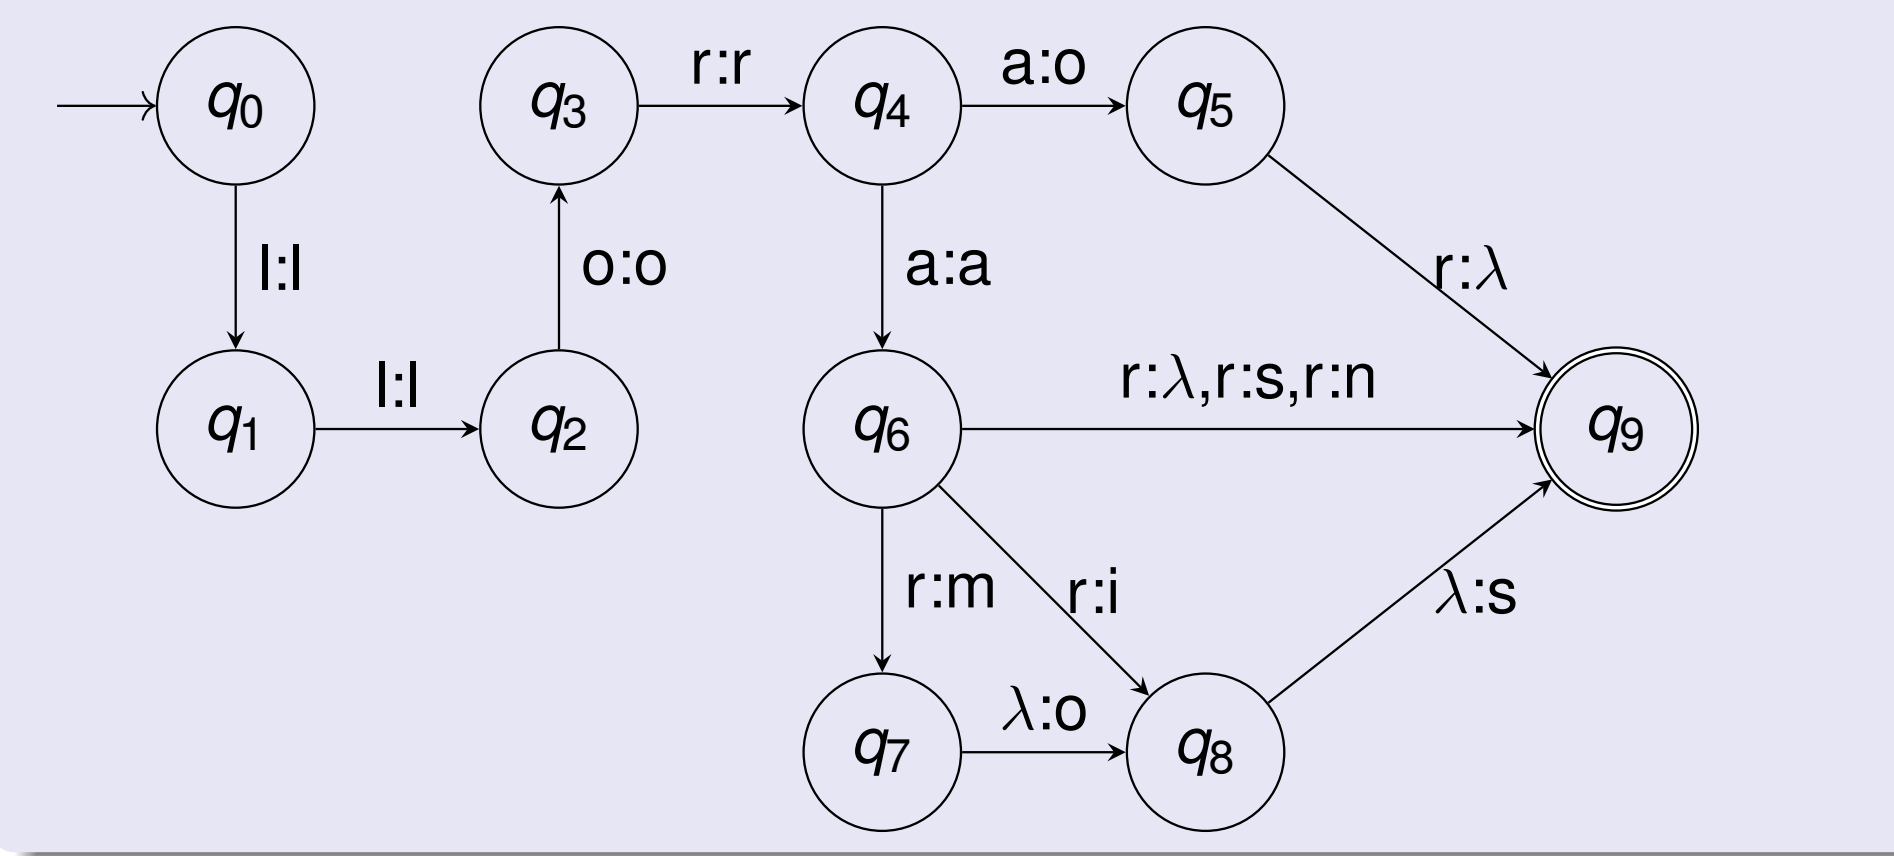




In [ ]:
from pyformlang.fst import FST


In [ ]:
from pyformlang.fst import FST
conjug = FST()
conjug.add_transitions([('q0','l','q1',['l']),
                        ('q1','l','q2',['l']),
                        ('q2','o','q3',['o']),
                        ('q3','r','q4',['r']),
                        ('q4','a','q5',['o']),
                        ('q4','a','q6',['a']),
                        ('q6','r','q7',['m']),
                        ('q6','r','q8',['i']),
                        ('q7','epsilon','q8',['o']),
                        ('q8','epsilon','q9',['s']),
                        ('q5','r','q9',['']),
                        ('q6','r','q9',['']),
                        ('q6','r','q9',['s']),
                        ('q6','r','q9',['n'])])
conjug.add_start_state('q0')
conjug.add_final_state('q9')

In [ ]:
print(list(map(lambda x: "".join(x),list(conjug.translate('llorar')))))

['lloran', 'lloras', 'llora', 'llorais', 'lloramos', 'lloro']


# Third example
Considering the following FST implemented in python using pyformlang, draw the transition diagram and explain the output given the call to the funtion translate using the list `["you", "are", "happy"] `as input

In [ ]:
fst = FST()
fst.add_transitions(
    [(0, "I", 1, ["Je"]), (1, "am", 2, ["suis"]),
    (2, "happy", 3, ["content"]),
    (2, "happy", 3, ["bien", "content"]),
    (0, "you", 4, ["tu"]), (4, "are", 2, ["es"]),
    (0, "you", 5, ["vous"]), (5, "are", 2, ["etes"])])
fst.add_start_state(0)
fst.add_final_state(3)

print(fst.states)
list(fst.translate(["I", "am", "happy"]))



{0, 1, 2, 3, 4, 5}


[['Je', 'suis', 'bien', 'content'], ['Je', 'suis', 'content']]